In [5]:
# Import necessary libraries
from gw_grb_correlation.Fermi import download_and_preprocess_fermi_data
from gw_grb_correlation.Fermi.visualization import plot_all_detector_positions, create_time_data_plots, create_location_data_plots
from gw_grb_correlation.Fermi.util import duration, filtering, read_GW_data, remove_duplicate_times_in_gw_data, compare_time_within_range

In [ ]:
# Download and preprocess Fermi data
start_year = 2015
end_year = 2026
fermi_data = download_and_preprocess_fermi_data(start_year=start_year, end_year=end_year, download_or_not=False)


Preprocessed data saved to ./fermi_data/fermi/

Preprocessed data saved to ./fermi_data/fermi/


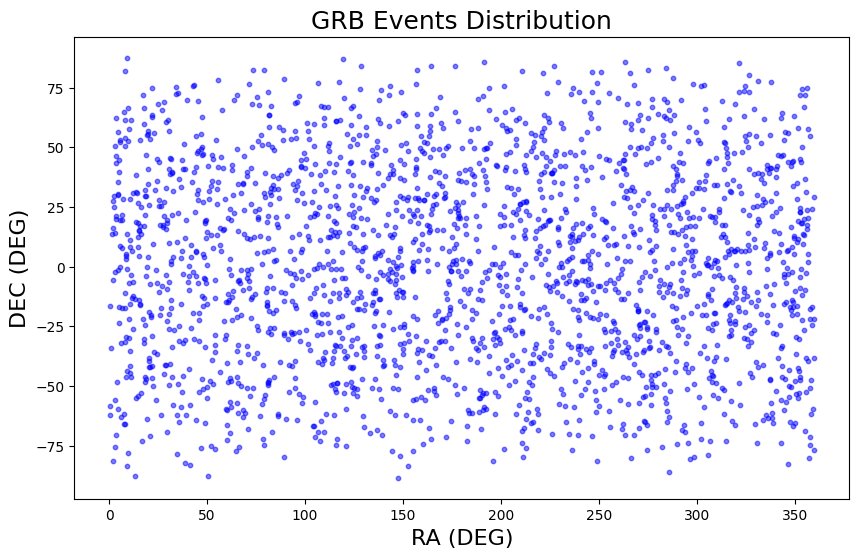

In [9]:
# Explore the dataset and create visualizations
create_time_data_plots(fermi_data, 'plots')
create_location_data_plots(fermi_data, 'plots')
plot_all_detector_positions(fermi_data.head(9))

In [10]:
# Filter out short GRB data
short_GRB_data = filtering(fermi_data, criteria={'T90': lambda x: x <= 2.1})

# Calculate the duration (difference between max TSTOP and min TSTART) and count the short GRB event number
duration_short_GRB = duration(short_GRB_data)
event_num_short_GRB = len(short_GRB_data)

# Calculate the average occurrence rate (events per unit of time)
average_occurrence_rate = event_num_short_GRB / duration_short_GRB

# Print the results
print(f"Number of events: {event_num_short_GRB}")
print(f"Total duration: {duration_short_GRB} seconds")
print(f"Average occurrence rate: {average_occurrence_rate} events per second")

Number of events: 354
Total duration: 323245732.96269 seconds
Average occurrence rate: 1.0951420665492892e-06 events per second


In [ ]:
# Load GW data
gw_data = read_GW_data(f"./gw_data/totalgwdata.csv")
gw_times = remove_duplicate_times_in_gw_data(gw_data)

# Find matched GRB-GW event pairs
match = compare_time_within_range(short_GRB_data, gw_times, time_range_seconds=86400*3)
filtered_gw_events = gw_data[gw_data['times'].isin(match['gw_time'])]
match.to_csv("GRB_GW_event_pairs.csv", index=False)
filtered_gw_events.to_csv("Filtered_GW_events.csv", index=False)

Data from ./gw_data/totalgwdata.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418227 entries, 0 to 2418226
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ra          float64
 2   dec         float64
 3   times       float64
 4   weights     float64
dtypes: float64(4), int64(1)
memory usage: 92.2 MB
None
   Unnamed: 0        ra       dec         times   weights
0           0  1.891867 -1.250744  1.126259e+09  0.000024
1           1  1.254342 -1.228042  1.126259e+09  0.000024
2           2  1.666787 -1.279668  1.126259e+09  0.000024
3           3  1.863250 -1.261367  1.126259e+09  0.000024
4           4  0.994238 -1.036272  1.126259e+09  0.000024
Number of unique times after applying threshold: 91
First few unique times:
               times                          date
0       1.126259e+09 2015-09-14 09:51:02.000000000
44173   1.128679e+09 2015-10-12 09:55:00.000000000
79620   1.135136e+09 20

C:\Users\colon\OneDrive\桌面\TheoryWork\group_project_2025\gw_grb_correlation\Fermi\util.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fermi_data['ALIGNED_SEC'] = pd.to_numeric(fermi_data['TSTART'], errors='coerce')
C:\Users\colon\OneDrive\桌面\TheoryWork\group_project_2025\gw_grb_correlation\Fermi\util.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fermi_data['ALIGNED_SEC'] = fermi_data['ALIGNED_SEC'] + (fermi_start_date - pd.Timestamp("1980-01-01")).total_seconds()


Found 44 matches within 259200 seconds.
